# HW2 - Basic Data Processing for Data Mining

#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2018
#### Due : 5/23 (WED)  11:59 PM 

------------------------------------------
## __ Ready for Assingment __
-  install [python](https://www.python.org/)

- install python
     - install [anaconda](https://www.continuum.io/downloads) for science, math, and data analysis.
     
       The installation process please refer to the __blackboard__.


- install libraries
     - install libraries
         - [NumPy](http://docs.scipy.org/doc/numpy-dev/user/index.html), fot arrays
         - [pandas](http://pandas.pydata.org/), for data frames
         - [matplotlib](http://matplotlib.org/), for plotting
         - [requests](http://docs.python-requests.org/en/latest/), for fetching web content
         - [pattern](http://www.clips.ua.ac.be/pages/pattern) or [beautiful soup](http://www.crummy.com/software/BeautifulSoup/bs4/doc/), for parsing html and xml pages
         
------------------------------------------

### CHECK YOUR PYTHON VERSION
- #### Assingment made by python 3.x
- #### It will be easy for you to use same version with TA

In [11]:
import sys
sys.version

'3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]'

## Python Assingment HW2 Guide
- You need to fill out your code in ###YOUR CODE HERE### or #TODO.
- The code results should be the same as the results displayed below the code or the format we gave in problem description.
- The necessary libraries are already imported below.
    - If you don't have some libraries, install it with pip or conda command. [Google will help you]

In [2]:
%matplotlib inline 
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Problem1. Web Crawling & Processing

### Problem 1-1 Fetching the Wikipedia site

#### print html code of presented page
#### Use requests library
> *`<!DOCTYPE html>`*<br/>
> *`<html class="client-nojs" lang="en" dir="ltr">`*<br/>
> *`<head>`*<br/>
> *`<meta charset="UTF-8"/>`*<br/>
> *`<title>List of 2016 Summer Olympics medal winners - Wikipedia</title>`*<br/>
> *`...`*<br/>
> *`</script>`*<br/>
> *`</body>`*<br/>
> *`</html>`*<br/>

In [13]:
url = "https://en.wikipedia.org/wiki/List_of_2016_Summer_Olympics_medal_winners"

###YOUR CODE HERE###
# request 모듈을 사용하여 웹 페이지의 내용을 가져온다.
r = requests.get(url)

print(r.text)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>List of 2016 Summer Olympics medal winners - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_2016_Summer_Olympics_medal_winners","wgTitle":"List of 2016 Summer Olympics medal winners","wgCurRevisionId":839965383,"wgRevisionId":839965383,"wgArticleId":44675550,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["2016 Summer Olympics","Lists of Summer Olympic medalists by year","Medalists at the 2016 Summer Olympics","Rio de Janeiro (city)-related lists"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparato

### Problem 1-2 Parsing html data
#### Data that we are going to use is table titled below:
#### Title: Swimming men's events
#### Use BeautifulSoup libary

*print html code of parsed table: Swimming men's events*

> *`<table border="" class="class1 class2" style="font-size: 100%">`*<br/>
> *`<tr style="text-align: center;">`*<br/>
> *`<th scope="col" style="width: 120px;">Event</th>`*<br/>
> *`...`*<br/>
> *`</td>`*<br/>
> *`</tr>`*<br/>
> *`</table>`*<br/>

__*hint: class/id can be assigned for elements of html.*__

In [14]:
#step1: look at html source!"
#step2: get all tables"
#step3: get table we care about"

###YOUR CODE HERE###
# Use lxml parser to analyze
soup = BeautifulSoup(r.text, "lxml")

# find the 'Swmming' part
mens_swimming = soup.find("span", id="Swimming").parent

# get the next wikitable using 'find_next_sibling()'
table = mens_swimming.find_next_sibling("table", class_="wikitable plainrowheaders")
print(table)

<table border="1" class="wikitable plainrowheaders" style="font-size: 100%">
<tr style="text-align: center;">
<th scope="col" style="width: 120px;">Event</th>
<th colspan="2" scope="col" style="width: 200px; background: #FFD700;">Gold</th>
<th colspan="2" scope="col" style="width: 200px; background: #CCCCCC;">Silver</th>
<th colspan="2" scope="col" style="width: 200px; background: #CC9966;">Bronze</th>
</tr>
<tr>
<td>50 m freestyle<br/>
<span class="noprint" style="font-size:90%; font-style:italic;"><a href="/wiki/Swimming_at_the_2016_Summer_Olympics_%E2%80%93_Men%27s_50_metre_freestyle" title="Swimming at the 2016 Summer Olympics – Men's 50 metre freestyle">details</a></span></td>
<td><a href="/wiki/Anthony_Ervin" title="Anthony Ervin">Anthony Ervin</a><br/>
<img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" height="12" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/23px-Flag_of_the_United_States.svg.png" srcset="//upload.w

### Problem 1-3 Extracting data and filling it into a dictionary(Python data stucture)

#### Extract  countries and medals from "Athletics - Women" table and store it in dictionary.
*Please print parsed dictionary at the end of code*

#### Shape of Dictionary
__Include only once if athlete have received the same medal more than once. ex) 100m gold Bolt, 200m gold Bolt -> gold: Bolt__
- { *country_name*: { *medal type*: [*athlete name,* *athlete name,* *athlete name,* ...], ... }}
- e.g. {'Jamaica': {'Gold': ['Elaine Thompson', 'Shaunae Miller'...], 'Silver': [...], 'Bronze': [...] }, 'United States': ... }

*__hint: Use above problem's code to get Atheletics - Women table__*

In [15]:
# extract headings and actual data and combine data into single dict

###YOUR CODE HERE###
# find the "Badminton" part
badminton = soup.find("span", id="Badminton").parent

# get the previous wikitable(Women Atheletics) using 'find_previous_sibling()'
W_athletics = badminton.find_previous_sibling("table", class_="wikitable plainrowheaders")

relay_list = []
else_list = []

for else_tr in W_athletics.find_all('tr')[1:13]:
    for else_a in else_tr.find_all('a'):
        text = else_a.get_text()
        if text not in {"details", "WR", "AR", "CR", "GR", "NR", "OR", "PB", "SB", "WL"}:
            else_list.append(text)

# extract relay results in this way because the sturcture is different from the others
for relay_tr in W_athletics.find_all('tr')[13:15]:
    for relay_a in relay_tr.find_all('a'):
        text = relay_a.get_text()        
        if text not in {"details", "NR"}:
            relay_list.append(text)

for else_tr in W_athletics.find_all('tr')[15:-1]:
    for else_a in else_tr.find_all('a'):
        text = else_a.get_text()
        if text not in {"details", "WR", "AR", "CR", "GR", "NR", "OR", "PB", "SB", "WL"}:
            else_list.append(text)

medal_list = []
# Make a list of athletes excpet relay by ['Country', 'Medal', 'Name']
for i in range(len(else_list)):
    if i % 6 == 0:
        medal_list.append((else_list[i+1], 'Gold', else_list[i]))
    if i % 6 == 2:
        medal_list.append((else_list[i+1], 'Silver', else_list[i]))
    if i % 6 == 4:
        medal_list.append((else_list[i+1], 'Bronze', else_list[i]))

# Make a list of relay athletes by ['Country', 'Medal', 'Name']
for i in range(len(relay_list)):
    if 0 < i <= 5:
        medal_list.append((relay_list[0], 'Gold', relay_list[i]))
    if 6 < i <= 12:
        medal_list.append((relay_list[6], 'Silver', relay_list[i]))
    if 13 < i <= 17:
        medal_list.append((relay_list[13], 'Bronze', relay_list[i]))
    if 18 < i <= 24:
        medal_list.append((relay_list[18], 'Gold', relay_list[i]))
    if 25 < i <= 31:
        medal_list.append((relay_list[25], 'Silver', relay_list[i]))
    if 32 < i <= 37:
        medal_list.append((relay_list[32], 'Bronze', relay_list[i]))

# let's make a dictionary from list of tuples!
result = {}
for country, medal, athlete in medal_list:
    country_data = result.setdefault(country, {})
    athlete_data = country_data.setdefault(medal, [])
    # Include only once if athlete have received the same medal more than once
    if athlete not in athlete_data:
        athlete_data.append(athlete)

print(result)

{'Jamaica': {'Gold': ['Elaine Thompson'], 'Bronze': ['Shelly-Ann Fraser-Pryce', 'Shericka Jackson'], 'Silver': ['Christania Williams', 'Elaine Thompson', 'Veronica Campbell-Brown', 'Shelly-Ann Fraser-Pryce', 'Simone Facey', 'Sashalee Forbes', 'Stephenie Ann McPherson', 'Anneisha McLaughlin-Whilby', 'Shericka Jackson', 'Novlene Williams-Mills', 'Christine Day', 'Chrisann Gordon']}, 'United States': {'Silver': ['Tori Bowie', 'Allyson Felix', 'Nia Ali', 'Sandi Morris', 'Britney Reese'], 'Bronze': ['Tori Bowie', 'Jennifer Simpson', 'Kristi Castlin', 'Ashley Spencer', 'Emma Coburn'], 'Gold': ['Brianna Rollins', 'Dalilah Muhammad', 'Tianna Bartoletta', 'Michelle Carter', 'Allyson Felix', 'English Gardner', 'Tori Bowie', 'Morolake Akinosun', 'Phyllis Francis', 'Natasha Hastings', 'Courtney Okolo', 'Taylor Ellis-Watson', 'Francena McCorory']}, 'Netherlands': {'Silver': ['Dafne Schippers']}, 'Bahamas': {'Gold': ['Shaunae Miller']}, 'South Africa': {'Gold': ['Caster Semenya'], 'Silver': ['Sunett

### Problem 1-4 Creating a dataframe(Python data structure) from a dictionary

#### Use Dictionary that you made in problem 1-3

#### Use Pandas library

__* Shape of dataframe must be like following table.__
<table>
  <tr>
    <th></th>
    <th>Gold</th>
    <th>Silver</th>
    <th>Bronze</th>
  </tr>
  <tr>
    <td>Jamaica</td>
    <td>Elaine Thompson, Shaunae Miller ... </td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td>United States</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
</table>

In [16]:
# create dataframe
# Use the following code
# indices: countries, columns: Medal type

###YOUR CODE HERE###
df = pd.DataFrame.from_dict(result, orient='index')
df = pd.DataFrame(df, columns=['Gold', 'Silver', 'Bronze']).fillna(0)
df

,Gold,Silver,Bronze
Bahamas,[Shaunae Miller],0,0
Bahrain,[Ruth Jebet],[Eunice Kirwa],0
Belgium,[Nafissatou Thiam],0,0
Bulgaria,0,[Mirela Demireva],0
Burundi,0,[Francine Niyonsaba],0
Canada,0,0,[Brianne Theisen-Eaton]
China,[Liu Hong],[Zhang Wenxiu],[Lü Xiuzhi]
Colombia,[Caterine Ibargüen],0,0
Croatia,"[Sandra Perković, Sara Kolak]",0,[Blanka Vlašić]
Cuba,0,0,[Denia Caballero]


### Problem 1-5 Sort Data Frame
### Sort Country names by number of Gold medal athletes (Descending order)
- __Show in table form (e.g. pd.DataFrame.describe())__
<table>
  <tr>
    <th></th>
    <th>Gold</th>
    <th>Silver</th>
    <th>Bronze</th>
  </tr>
  <tr>
    <td>Jamaica</td>
    <td>Elaine Thompson, Shaunae Miller ... </td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td>United States</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
</table>

In [17]:
###YOUR CODE HERE###
# Create new column named 'Gold_num' temporarily and save number of Gold medal athletes
df['Gold_num'] = df['Gold'].str.len()
# Sort it by descending value, drop 'Gold_num' column, and show the top 15 countries
df = df.sort_values(by=['Gold_num'], ascending=False).drop(columns=['Gold_num'])
df.head(15)

,Gold,Silver,Bronze
United States,"[Brianna Rollins, Dalilah Muhammad, Tianna Bar...","[Tori Bowie, Allyson Felix, Nia Ali, Sandi Mor...","[Tori Bowie, Jennifer Simpson, Kristi Castlin,..."
Kenya,"[Faith Kipyegon, Vivian Cheruiyot, Jemima Sumg...","[Hellen Onsando Obiri, Vivian Cheruiyot, Hyvin...",[Margaret Wambui]
Croatia,"[Sandra Perković, Sara Kolak]",0,[Blanka Vlašić]
Bahamas,[Shaunae Miller],0,0
Bahrain,[Ruth Jebet],[Eunice Kirwa],0
Belgium,[Nafissatou Thiam],0,0
China,[Liu Hong],[Zhang Wenxiu],[Lü Xiuzhi]
Colombia,[Caterine Ibargüen],0,0
Ethiopia,[Almaz Ayana],[Genzebe Dibaba],"[Almaz Ayana, Tirunesh Dibaba, Mare Dibaba]"
Greece,[Ekaterini Stefanidi],0,0


### Problem 1-6 Handle Data Frame
### Which country has the most bronze medals in Atheletics - Women? 
- __Make sub data frame__
- __Show in table form (e.g. pd.DataFrame.describe())__
<table>
  <tr>
    <th></th>
    <th>Bronze</th>
  </tr>
  <tr>
    <td>United States</td>
    <td>Tori Bowie ...</td>
</table>

In [18]:
###YOUR CODE HERE###
sub_df = df
# drop Gold and Silver columns from sub_df
sub_df = sub_df.drop(['Gold', 'Silver'], axis=1)

sub_df['Bronze_num'] = sub_df['Bronze'].str.len()
sub_df.sort_values(by=['Bronze_num'], ascending=False).drop(columns=['Bronze_num']).head(1)

,Bronze
Great Britain,"[Sophie Hitchon, Asha Philip, Desiree Henry, D..."


## Project Problem 1
- __URL : https://en.wikipedia.org/wiki/List_of_Intel_microprocessors __
- __Crawl "7th generation Core/Kaby Lake/Skylake (X-series Processors)/Apollo Lake - desktop" table in given URL__
- __Make data frame same as in wiki page with cralwed table (Show in table form)__
- __Sort model name by "Base Frequency" (Show in table form)__ 

In [19]:
###YOUR CODE HERE###
url2 = "https://en.wikipedia.org/wiki/List_of_Intel_microprocessors"

# request 모듈을 사용하여 웹 페이지의 내용을 가져온다.
r2 = requests.get(url2)
# Use lxml parser to analyze
soup = BeautifulSoup(r2.text, "lxml")
# find 'Apollo Lake' part
apollo = soup.find("span", id="7th_generation_Core/Kaby_Lake/Skylake_(X-series_Processors)/Apollo_Lake").parent

# get the next wikitable using 'find_next_sibling()'
table2 = apollo.find_next_sibling("table", class_="wikitable sortable")
print(table2)

<table class="wikitable sortable" style="text-align: center;">
<tr>
<th>Model</th>
<th>Price (USD)</th>
<th>Cores/Threads</th>
<th>Base <a href="/wiki/Clock_rate" title="Clock rate">frequency</a> (GHz)</th>
<th>Max <a href="/wiki/Intel_Turbo_Boost" title="Intel Turbo Boost">turbo</a> frequency (GHz)</th>
<th><a class="mw-redirect" href="/wiki/Intel_HD_and_Iris_Graphics" title="Intel HD and Iris Graphics">GPU</a></th>
<th>Maximum GPU<br/>
clock rate (MHz)</th>
<th>L3<br/>
cache (MB)</th>
<th>TDP (W)</th>
<th>Socket</th>
<th>Release</th>
</tr>
<tr>
<td><a class="external text" href="https://ark.intel.com/products/126699/Intel-Core-i9-7980XE-X-series-Processor-24_75M-Cache-up-to-4_20-" rel="nofollow">i9-7980XE</a></td>
<td>$1999</td>
<td data-sort-value="26">18/36</td>
<td>2.6</td>
<td>4.2</td>
<td>N/A</td>
<td>N/A</td>
<td>24.75</td>
<td>165</td>
<td><a href="/wiki/LGA_2066" title="LGA 2066">LGA 2066</a></td>
<td>Q3 2017<sup class="reference" id="cite_ref-:0_1-0"><a href="#cite_note-:0-1

In [20]:
###YOUR CODE HERE###
cpu_list = []
for rows in table2.find_all('tr'):
    for columns in rows.find_all('td'):
        text = columns.get_text()        
        if text == 'Q3 2017[1]':
            cpu_list.append('Q3 2017')
        else:
            cpu_list.append(text)

arranged_cpu_dict = {}
# Make a dict of cpu list arranged by Model, Price...
for i in range(len(cpu_list)):
    if i % 11 == 0:
        arranged_cpu_dict.setdefault('Model', []).append(cpu_list[i])
    if i % 11 == 1:
        arranged_cpu_dict.setdefault('Price(USD)', []).append(cpu_list[i])
    if i % 11 == 2:
        arranged_cpu_dict.setdefault('Cores/Threads', []).append(cpu_list[i])
    if i % 11 == 3:
        arranged_cpu_dict.setdefault('Base frequency(GHz)', []).append(cpu_list[i])
    if i % 11 == 4:
        arranged_cpu_dict.setdefault('Max turbo frequency(GHz)', []).append(cpu_list[i])
    if i % 11 == 5:
        arranged_cpu_dict.setdefault('GPU', []).append(cpu_list[i])
    if i % 11 == 6:
        arranged_cpu_dict.setdefault('Maximum GPU clock rate(MHz)', []).append(cpu_list[i])
    if i % 11 == 7:
        arranged_cpu_dict.setdefault('L3 cache(MB)', []).append(cpu_list[i])
    if i % 11 == 8:
        arranged_cpu_dict.setdefault('TDP(W)', []).append(cpu_list[i])
    if i % 11 == 9:
        arranged_cpu_dict.setdefault('Socket', []).append(cpu_list[i])
    if i % 11 == 10:
        arranged_cpu_dict.setdefault('Release', []).append(cpu_list[i])

print(arranged_cpu_dict)

{'Model': ['i9-7980XE', 'i9-7960X', 'i9-7940X', 'i9-7920X', 'i9-7900X', 'i7-7820X', 'i7-7800X', 'i7-7740X', 'i7-7700K', 'i7-7700', 'i7-7700T', 'i5-7640X', 'i5-7600K', 'i5-7600', 'i5-7600T', 'i5-7500', 'i5-7500T', 'i5-7400', 'i5-7400T', 'i3-7350K', 'i3-7320', 'i3-7300', 'i3-7300T', 'i3-7100', 'i3-7100T', 'i3-7101E', 'i3-7101TE', 'G4620', 'G4600', 'G4600T', 'G4560', 'G4560T', 'G3950', 'G3930', 'G3930T'], 'Price(USD)': ['$1999', '$1699', '$1399', '$1189', '$999', '$599', '$389', '$350', '$350', '$312', '$312', '$242', '$243', '$224', '$224', '$202', '$202', '$182', '$187', '$179', '$157', '$147', '$147', '$117', '$117', '$117', '$117', '$93', '$82', '$75', '$64', '$64', '$52', '$42', '$42'], 'Cores/Threads': ['18/36', '16/32', '14/28', '12/24', '10/20', '8/16', '6/12', '4/8', '4/8', '4/8', '4/8', '4/4', '4/4', '4/4', '4/4', '4/4', '4/4', '4/4', '4/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/2', '2/2', '2/2'], 'Base frequency(GHz)': ['2

In [21]:
###YOUR CODE HERE###
#Make data frame same as in wiki page with cralwed table
cpu_table = pd.DataFrame(arranged_cpu_dict, columns=['Model', 'Price(USD)', 'Cores/Threads',
                                                    'Base frequency(GHz)','Max turbo frequency(GHz)',
                                                    'GPU', 'Maximum GPU clock rate(MHz)', 'L3 cache(MB)',
                                                    'TDP(W)', 'Socket', 'Release'])
cpu_table.head(10)

,Model,Price(USD),Cores/Threads,Base frequency(GHz),Max turbo frequency(GHz),GPU,Maximum GPU clock rate(MHz),L3 cache(MB),TDP(W),Socket,Release
0,i9-7980XE,$1999,18/36,2.6,4.2,N/A,N/A,24.75,165,LGA 2066,Q3 2017
1,i9-7960X,$1699,16/32,2.8,4.2,N/A,N/A,22.00,165,LGA 2066,Q3 2017
2,i9-7940X,$1399,14/28,3.1,4.3,N/A,N/A,19.25,165,LGA 2066,Q3 2017
3,i9-7920X,$1189,12/24,2.9,4.3,N/A,N/A,16.50,140,LGA 2066,Q3 2017
4,i9-7900X,$999,10/20,3.3,4.3,N/A,N/A,13.75,140,LGA 2066,Q2 2017
5,i7-7820X,$599,8/16,3.6,4.3,N/A,N/A,11.00,140,LGA 2066,Q2 2017
6,i7-7800X,$389,6/12,3.5,4.0,N/A,N/A,8.25,140,LGA 2066,Q2 2017
7,i7-7740X,$350,4/8,4.3,4.5,N/A,N/A,8,112,LGA 2066,Q1 2017
8,i7-7700K,$350,4/8,4.2,4.5,HD 630,1150,8,91,LGA 1151,Q1 2017
9,i7-7700,$312,4/8,3.6,4.2,HD 630,1150,8,65,LGA 1151,Q1 2017


In [22]:
###YOUR CODE HERE###
#Sort model name by "Base Frequency" 
# you can delete '.reset_index(drop=True)' from the code if you want to see original index
cpu_table.sort_values(by=['Base frequency(GHz)'], ascending=False).reset_index(drop=True).head(10)

,Model,Price(USD),Cores/Threads,Base frequency(GHz),Max turbo frequency(GHz),GPU,Maximum GPU clock rate(MHz),L3 cache(MB),TDP(W),Socket,Release
0,i7-7740X,$350,4/8,4.3,4.5,N/A,N/A,8,112,LGA 2066,Q1 2017
1,i7-7700K,$350,4/8,4.2,4.5,HD 630,1150,8,91,LGA 1151,Q1 2017
2,i3-7350K,$179,2/4,4.2,N/A,HD 630,1150,4,60,LGA 1151,Q1 2017
3,i3-7320,$157,2/4,4.1,N/A,HD 630,1150,4,51,LGA 1151,Q1 2017
4,i3-7300,$147,2/4,4.0,N/A,HD 630,1150,4,51,LGA 1151,Q1 2017
5,i5-7640X,$242,4/4,4.0,4.2,N/A,N/A,6,112,LGA 2066,Q1 2017
6,i3-7101E,$117,2/4,3.9,N/A,HD 630,1100,3,54,LGA 1151,Q1 2017
7,i3-7100,$117,2/4,3.9,N/A,HD 630,1100,3,51,LGA 1151,Q1 2017
8,i5-7600K,$243,4/4,3.8,4.2,HD 630,1150,6,91,LGA 1151,Q1 2017
9,G4620,$93,2/4,3.7,N/A,HD 630,1100,3,51,LGA 1151,Q1 2017


## Problem2. Processing Data with Data Frame

### Fetching data from tsv(tab-separated values)
We will give you GDP per capita in tsv format.
(Gross domestic product per capita, current prices in USD; International Monetary Fund, World Economic Outlook Database, October 2016) 

What you have to do is read data from tsv, put it in pandas dataframe, manipulate data so that it is ready for analyse.

In [23]:
tsv = pd.read_csv('GDPperCapByTab.txt',sep='\t',index_col=0) 
# this will let you read data from file name ~~ , and understand <tab> as delimiter

tsv # You can check whether data is correctly loaded in your df(;tsv) or not

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1980,1981,1982,1983,1984,1985,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",NaN,NaN,NaN,NaN,NaN,NaN,...,324.705,380.91,435.472,539.667,614.661,680.5,660.221,650.663,615.091,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",704.588,791.287,798.011,790.099,764.21,764.529,...,"3,594.10","4,377.04","4,130.93","4,098.13","4,439.56","4,249.04","4,413.28","4,574.80","3,946.00",2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","2,268.61","2,305.51","2,254.33","2,316.68","2,432.72","2,753.70",...,"3,986.56","4,943.50","3,886.06","4,480.72","5,430.57","5,574.20","5,475.71","5,458.88","4,174.82",2015.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",668.88,609.544,593.834,603.066,622.792,680.914,...,"2,882.80","3,897.51","3,393.55","3,599.27","4,411.58","4,744.88","4,988.92","4,915.92","3,876.20",2015.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","1,920.27","2,177.10","2,448.57","2,752.96","3,200.97","3,764.00",...,"15,725.92","16,259.67","14,403.92","13,413.49","13,205.07","13,929.37","13,733.96","13,818.57","14,100.43",2011.0
Argentina,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","8,106.24","6,467.99","3,158.51","3,841.89","4,241.38","3,149.68",...,"7,315.73","9,146.79","8,337.81","10,412.95","12,787.81","13,889.79","14,488.83","13,208.83","14,616.72",2013.0
Armenia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",NaN,NaN,NaN,NaN,NaN,NaN,...,"3,079.03","3,913.44","2,911.76","3,128.48","3,426.39","3,575.53","3,732.04","3,889.00","3,520.95",2014.0
Australia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","11,000.99","12,521.00","12,227.53","11,585.13","12,567.63","10,961.08",...,"45,127.40","49,190.01","45,584.23","56,330.16","66,769.42","68,028.94","64,664.26","61,165.63","51,180.95",2015.0
Austria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","10,707.97","9,259.99","9,246.95","9,396.19","8,862.78","9,070.48",...,"46,652.91","51,629.66","47,785.55","46,757.11","51,192.58","48,372.14","50,586.42","51,215.50","43,413.63",2015.0


### Problem 2-1 Data Cleaning
1. Drop everything but "name of country" and "data by year(1980 ~ 2010)".
2. Modify data so that you can change it to float type number. (For example, u'1,421.84' can not be changed to float while "," exists.) 'NaN' can be changed to np.nan.
<br><b>Hint, you can change type of whole data to float in one instuction if your data is in good format. </b>

In [24]:
###YOUR CODE HERE###
# Drop everything but "name of country" and "data by year(1980 ~ 2010)", and remove row which has 'NaN' values
new_tsv = tsv.drop(columns=['Subject Descriptor', 'Units', 'Scale', 'Country/Series-specific Notes', 'Estimates Start After', 
                            '2011', '2012', '2013', '2014', '2015']).dropna()

# modify data type as float type
new_tsv = new_tsv.replace(',','', regex=True).astype(float)

new_tsv

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,,,,,,,,,,,
Albania,704.588,791.287,798.011,790.099,764.210,764.529,829.098,806.596,779.387,839.702,...,1283.570,1425.130,1846.120,2373.580,2673.730,2975.620,3594.100,4377.040,4130.930,4098.130
Algeria,2268.610,2305.510,2254.330,2316.680,2432.720,2753.700,2698.920,2705.110,2143.740,2127.870,...,1768.580,1806.860,2128.390,2636.310,3141.030,3508.960,3986.560,4943.500,3886.060,4480.720
Angola,668.880,609.544,593.834,603.066,622.792,680.914,619.801,690.823,729.631,826.108,...,508.857,690.923,761.596,1023.520,1428.460,2052.720,2882.800,3897.510,3393.550,3599.270
Antigua and Barbuda,1920.270,2177.100,2448.570,2752.960,3200.970,3764.000,4617.600,5455.280,6547.270,7273.220,...,10063.800,10326.850,10693.950,11315.240,12428.740,13995.040,15725.920,16259.670,14403.920,13413.490
Argentina,8106.240,6467.990,3158.510,3841.890,4241.380,3149.680,3739.410,3790.750,4386.530,2779.870,...,7851.660,2898.290,3648.060,4314.400,5163.550,5976.080,7315.730,9146.790,8337.810,10412.950
Australia,11000.990,12521.000,12227.530,11585.130,12567.630,10961.080,11238.550,12990.960,16238.940,18169.330,...,19420.740,21628.710,27225.780,32762.130,36143.610,37869.650,45127.400,49190.010,45584.230,56330.160
Austria,10707.970,9259.990,9246.950,9396.190,8862.780,9070.480,12857.300,16057.050,17593.410,17508.600,...,24510.780,26444.110,32176.920,36754.540,38319.370,40469.860,46652.910,51629.660,47785.550,46757.110
The Bahamas,9657.730,9818.390,10803.100,11755.460,12280.710,13200.750,14028.150,15187.690,15468.640,17143.080,...,21200.700,22310.510,21970.800,22124.060,23714.440,24215.200,24987.840,24481.890,22952.500,22957.790
Bahrain,10189.610,11061.390,11221.700,11117.660,11163.440,10182.370,7695.810,8049.360,9602.790,9668.040,...,13891.340,13498.640,14482.930,15960.530,17962.340,19263.410,20903.820,23231.040,19461.090,20823.220


In [25]:
print(new_tsv.index[0],new_tsv.iloc[0,0], type(new_tsv.iloc[0,0]))

Albania 704.588 <class 'numpy.float64'>


### Problem 2-2 Data  Grouping
### Get median value by country of each 5 years from 1980 to 2010
- __Condition 1 : Data should be in "int" type (numpy.int64 or else)__ 
- __Condition 2 : Dataframe should be in the form of given output (two cells below)__

In [26]:
resulttsv = new_tsv
# Think wisely! It does not require long code. For me, 3 lines were enough. You can do it :)
###YOUR CODE HERE###

# Discard year 2010 because we'll get median value from 1980-1984, ..., 2005-2009
resulttsv = new_tsv.drop(new_tsv.columns[[-1]], axis=1)
# group every 5 columns and get median values; convert them to int types
resulttsv = resulttsv.groupby(np.arange(len(resulttsv.columns))//5, axis=1).median().astype('int64')
# rename columns
resulttsv.columns = ['1980-1985', '1985-1990', '1990-1995', '1995-2000', '2000-2005', '2005-2010']

In [27]:
print(resulttsv.index[1],resulttsv.iloc[1,0],type(resulttsv.iloc[1,0]))
resulttsv.head()

Algeria 2305 <class 'numpy.int64'>


,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
Country,,,,,,
Albania,790,806,456,917,1425,3594
Algeria,2305,2698,1873,1633,1806,3886
Angola,609,690,623,404,690,2882
Antigua and Barbuda,2448,5455,8084,9678,10368,14403
Argentina,4241,3739,7420,8452,4314,7315


### Problem 2-3 Data  Filtering
### Filter Rows Where Median Value(1995 - 2000) Is Greater Than 10000
- __Hint, If you are not familiar with data filtering using pandas.dataframe, Please refer to the following link below  . __
    - __https://pythonspot.com/pandas-filter/__

In [28]:
###YOUR CODE HERE###
filtered_tsv = resulttsv[resulttsv['1995-2000'] > 10000]

In [29]:
print(filtered_tsv.index[1],filtered_tsv.iloc[1,0],type(filtered_tsv.iloc[1,0]))
filtered_tsv.head()

Austria 9259 <class 'numpy.int64'>


,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
Country,,,,,,
Australia,12227,12990,18643,21744,21628,45127
Austria,9259,16057,24098,27328,26444,46652
The Bahamas,10803,15187,15403,17198,21970,24215
Bahrain,11117,9602,10534,12140,14211,19461
Belgium,9179,14821,21843,25604,25197,44638


### Problem 2-4 Get Infant Mortality rate

### We need data from 1980-2010. Drop data which is not necessary


In [7]:
IMtsv = pd.read_csv('InfantMortalityByTab.txt',sep='\t',index_col=0)
###YOUR CODE HERE###
DroppedIMtsv = IMtsv.drop(IMtsv.columns[[0, 1, 2, 3, 4, 5, -1]], axis=1)

In [8]:
DroppedIMtsv.head()

,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
Afghanistan,159.16,134.14,111.31,98.68,89.53,79.51
Albania,43.20,37.84,30.74,26.30,20.25,16.11
Algeria,75.37,55.38,47.67,41.92,37.45,34.18
Angola,157.11,153.18,150.66,138.01,116.05,104.35
Argentina,32.20,27.13,24.36,21.85,15.04,14.61


## Problem3. Draw data as a plot

### Problem 3-1 Define a function to draw catter plot which contained trendline.
#### use .scatter from matplotlib library.
- please print *<b>line equation</b>* and *<b>MSE(mean squared error)</b>* for each plots
- matplotlib.pyplot.scatter: http://matplotlib.org/api/pyplot_api.html?highlight=scatter#matplotlib.pyplot.scatter
- you can find example of trendline on matplotlib very easily.

y = -0.193201x+(587.130497)
MeanSquaredError: 69424.19666194658


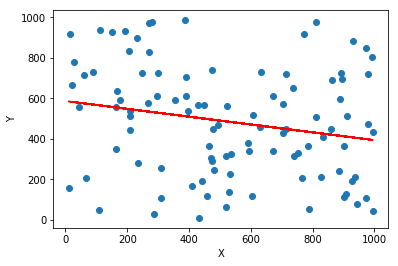

In [32]:
def plot_2D_trendline(x_data, y_data, pred=None, x_label='X', y_label='Y', title=None):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(x_data, y_data)
    
    if pred is not None:
        plt.plot(x_data, pred, color='red', linewidth=2)
    if title is not None:
        plt.title(title)
    
    # the line equation:
    fit = np.polyfit(x_data, y_data, deg=1)
    plt.plot(x_data, fit[0] * x_data + fit[1], color='red')
    print("y = %.6fx+(%.6f)"%(fit[0], fit[1]))

    #print Mean Squared Error
    mse = np.mean(( (fit[0] * x_data + fit[1]) - y_data) ** 2)
    print("MeanSquaredError:",mse)
    
    plt.show()

# Let's see if the function works.
plot_2D_trendline(np.random.randint(1000,size=100),np.random.randint(1000,size=100))    

### Problem 3-2 Draw scatter plot and trendline by using infant mortality rate and GDP per capita
- x-axis: *GDP per cap*, y-axis: *infant mortality*
- one plot per 5-year period (total 7 plots)
- The trend line may seem somewhat meaningless, but it isn't problem now.

y = -0.004391x+(78.549561)
MeanSquaredError: 1319.111838503054


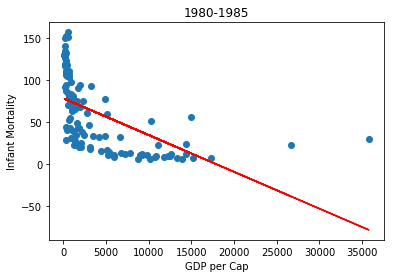

y = -0.003921x+(73.289828)
MeanSquaredError: 1084.793549892916


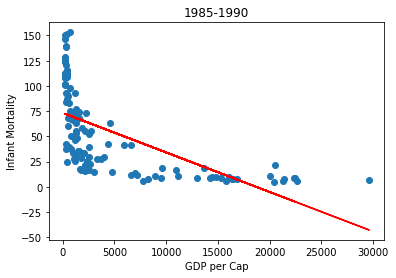

y = -0.002714x+(68.152645)
MeanSquaredError: 1459.8612813727893


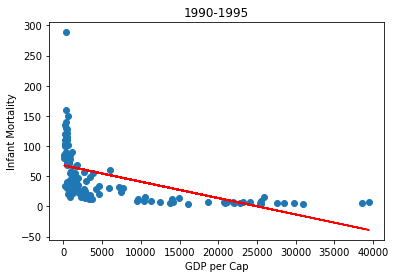

y = -0.002081x+(59.441947)
MeanSquaredError: 881.4121017005415


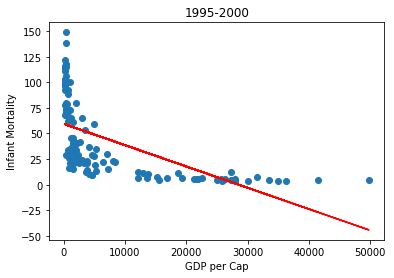

y = -0.001664x+(51.488415)
MeanSquaredError: 737.2003550601819


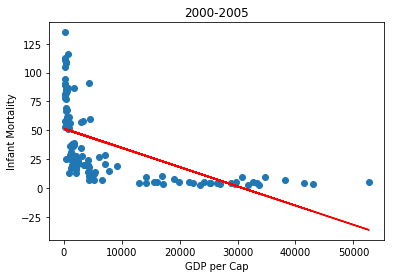

y = -0.000824x+(43.661688)
MeanSquaredError: 586.9330085292164


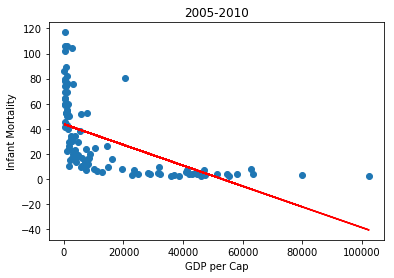

In [33]:
# First, delete country row from DroppedIMtsv & resulttsv until the two tables include same number of countries
# For example, if DroppedIMtsv has 'Afghanistan' but resulttsv doesn't, Trendline cannot be plotted !!

DroppedIMtsv = DroppedIMtsv[DroppedIMtsv.index.isin(resulttsv.index)]
resulttsv = resulttsv[resulttsv.index.isin(DroppedIMtsv.index)]
for years in DroppedIMtsv.columns:
    xData = resulttsv[years] 
    yData = DroppedIMtsv[years]
    
    plot_2D_trendline(xData, yData, x_label='GDP per Cap', y_label='Infant Mortality', title=years)

### Problem 3-3 Let's make trend line meaningful.
- As mentioned, the trend line is somewhat meaningless.
- By applying a *<b>logarithmic scale</b>* on the data, you can make trendlines more meaningful.
<br/>    ** hint: Most of mathmetical functions in python can be found in numpy.*

y = -0.560675x+(7.903582)
MeanSquaredError: 0.28320153968265493


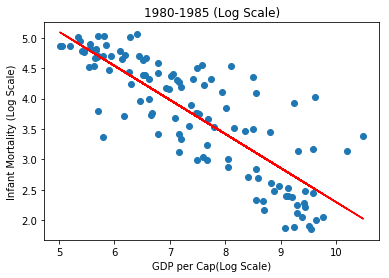

y = -0.603573x+(8.113553)
MeanSquaredError: 0.190270796216074


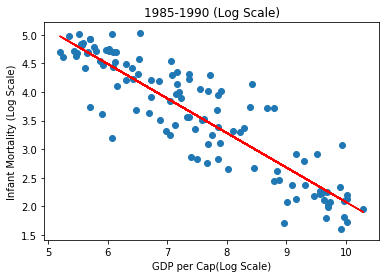

y = -0.578523x+(7.867051)
MeanSquaredError: 0.21963962422893024


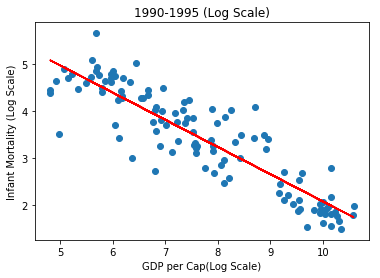

y = -0.616196x+(8.092657)
MeanSquaredError: 0.18136127038962224


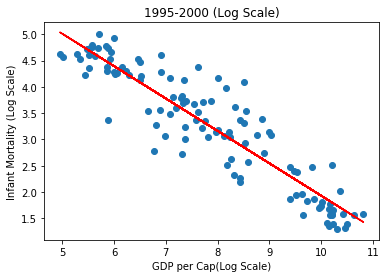

y = -0.611282x+(7.916058)
MeanSquaredError: 0.22116016903621596


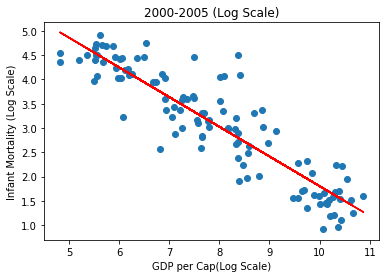

y = -0.610317x+(8.074355)
MeanSquaredError: 0.2737916519016044


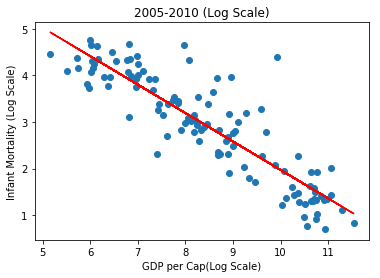

In [34]:
for years in DroppedIMtsv.columns:
    xDataLog = np.log(resulttsv[years])
    yDataLog = np.log(DroppedIMtsv[years])
    plot_2D_trendline(xDataLog, yDataLog, x_label='GDP per Cap(Log Scale)', y_label='Infant Mortality (Log Scale)', title=years+" (Log Scale)")

## Project Problem 2&3
- __Read Data forestfires.csv. Keep it mind this data is not tsv!__
- __Sorting & Filtering Data, each sub questions are independent, not related to each other. __
    - Filter rows which event occured in 1st quarter (January to April).
    - Filter rows where area is greater than average area value, and report average value also.
    - Sort descending order by FFMC value which event occured in Friday.
- __Draw plot with following directions, each sub questions are independent, not related to each other.__
    - Draw plot only using X, Y value, so we can know which part of park frequently fired.
    - Draw plot only using temp and wind, so we can know the relation between two features. Also draw trend line.
    - Draw plot only using temp and RH, so we can know the relation between two features. Also draw trend line.
    - Draw plot only using wind and RH, so we can know the relation between two features. Also draw trend line.

In [35]:
###YOUR CODE HERE###
# read data from csv file
csv = pd.read_csv('forestfires.csv')

# Sorting & Filtering Data, each sub questions are independent, not related to each other.
# 1. Filter rows which event occured in 1st quarter (January to April)
first_quarter = ['jan', 'feb', 'mar', 'apr']

# you can delete '.reset_index(drop=True)' from the code if you want to see original index
csv1 = csv[~csv['month'].isin(first_quarter)].reset_index(drop=True)
csv1.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
1,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
2,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
3,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
4,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0


In [36]:
# 2. compute average area value
area_mean = csv['area'].mean()
print('Average area value is: %f'%(area_mean))

# Filter rows where area is greater than average area value
csv2 = csv[csv['area'] > area_mean].reset_index(drop=True)
csv2.head()

Average area value is: 12.847292


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,4,feb,sun,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05
1,8,6,oct,wed,91.4,37.9,673.8,5.2,20.2,37,2.7,0.0,13.70
2,5,6,mar,sat,90.6,50.1,100.4,7.8,15.1,64,4.0,0.0,13.99
3,4,5,sep,thu,92.9,137.0,706.4,9.2,22.1,34,1.8,0.0,14.57
4,2,2,aug,sat,93.5,139.4,594.2,20.3,22.9,31,7.2,0.0,15.45


In [37]:
# 3. Filter rows which event occured on Friday, and sort descending order by FFMC value
csv3 = csv[csv.day == 'fri'].sort_values(by=['FFMC'], ascending=False).reset_index(drop=True)
csv3.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1,3,aug,fri,95.9,158.0,633.6,11.3,27.5,29,4.5,0.0,43.32
1,1,3,aug,fri,95.9,158.0,633.6,11.3,32.4,27,2.2,0.0,0.00
2,6,4,aug,fri,94.8,227.0,706.7,12.0,23.3,34,3.1,0.0,28.74
3,9,9,aug,fri,94.8,227.0,706.7,12.0,25.0,36,4.0,0.0,0.00
4,7,4,aug,fri,94.8,227.0,706.7,12.0,23.3,34,3.1,0.0,0.00


Show the most frequent (X,Y) values:
 Counter({(8, 6): 52, (6, 5): 49, (7, 4): 45, (3, 4): 43, (4, 4): 36, (2, 4): 27, (6, 3): 25, (2, 2): 25, (4, 5): 25, (5, 4): 23, (4, 3): 22, (2, 5): 20, (1, 2): 19, (1, 4): 15, (7, 5): 11, (1, 3): 10, (6, 4): 9, (4, 6): 8, (3, 5): 7, (9, 9): 6, (8, 5): 4, (5, 6): 4, (3, 6): 4, (1, 5): 4, (9, 4): 4, (5, 5): 3, (6, 6): 3, (8, 3): 3, (7, 3): 2, (7, 6): 2, (9, 5): 2, (3, 3): 1, (2, 3): 1, (9, 6): 1, (8, 4): 1, (8, 8): 1})


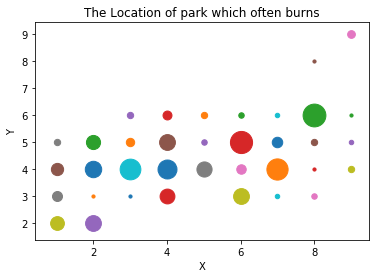

In [39]:
# Draw plot with following directions, each sub questions are independent, not related to each other.
# 1. Draw plot only using X, Y value, so we can know which part of park frequently fired.

# To draw bigger scatter circles for frequent (X,Y) values, let's count! 
import collections
num_park = []
for i in range(len(csv.X)):
    num_park.append((csv.X[i], csv.Y[i]))
# Count the number of frequency for each (X,Y) values, and show it.
counter=collections.Counter(num_park)
print('Show the most frequent (X,Y) values:\n', counter)

# As you can see in the scatter plot, frequent (X,Y) values are bigger than others.
for x,y in counter:
    plt.scatter(x, y, s=counter.get((x,y))*10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('The Location of park which often burns')
plt.show()

y = -0.736068x+(21.846398)
MeanSquaredError: 31.91586796308384


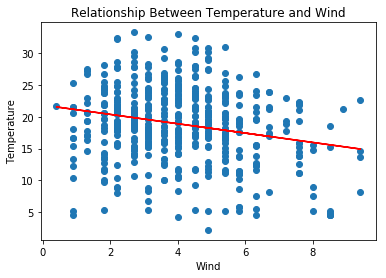

In [40]:
# 2. Draw plot only using temp and wind, so we can know the relation between two features. Also draw trend line.
plot_2D_trendline(csv.wind, csv.temp, x_label='Wind', y_label='Temperature', title='Relationship Between Temperature and Wind')

y = -0.187674x+(27.200894)
MeanSquaredError: 24.291783659657487


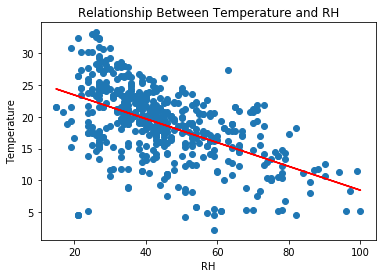

In [41]:
# 3. Draw plot only using temp and RH, so we can know the relation between two features. Also draw trend line.
plot_2D_trendline(csv.RH, csv.temp, x_label='RH', y_label='Temperature', title='Relationship Between Temperature and RH')

y = 0.632152x+(41.748467)
MeanSquaredError: 264.46449913970287


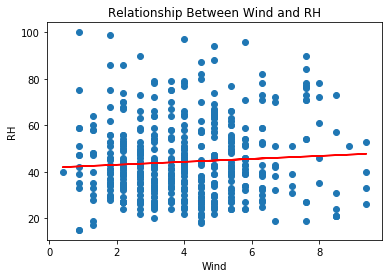

In [42]:
# 4. Draw plot only using wind and RH, so we can know the relation between two features. Also draw trend line.
plot_2D_trendline(csv.wind, csv.RH, x_label='Wind', y_label='RH', title='Relationship Between Wind and RH')

# FINISH